In [1]:
import rosbag
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
import numpy as np
import struct

In [2]:
import tams_pr2_guzheng

In [135]:
def big_plot():
    plt.figure(figsize=(15,8), dpi=100)

In [3]:
bag_name = '../../../../bags/guzheng_ff_e5_2022-09-07-21-05-36_extracted_episodes.bag'
bag = rosbag.Bag(bag_name)
episodes = [m for t,m,_ in bag.read_messages()]

In [4]:
import rospy
rospy.init_node('jupyter_lab')

import audio_common_msgs.msg
audio_pub= rospy.Publisher('guzheng/audio', audio_common_msgs.msg.AudioData, queue_size=10)

In [5]:
episodes_all = episodes

In [6]:
len(episodes)

423

In [7]:
# assume unique IDs (overwhelmingly likely, but if wrong we might want to know)
assert len({e.id for e in episodes}) == len(episodes)

In [8]:
# drop invalid samples
episodes_valid= [e for e in episodes_all if len(e.detected_audio_onsets) == 0 or len(e.detected_audio_onsets) > 0 and e.start_execution < e.detected_audio_onsets[0].header.stamp]

In [9]:
len(episodes_valid)

418

In [10]:
{e.string for e in episodes}

{'e5'}

In [11]:
episodes = episodes_valid
episodes_with_onset = [e for e in episodes if len(e.detected_audio_onsets) > 0]
episodes_with_one_onset = [e for e in episodes if len(e.detected_audio_onsets) == 1]
episodes_with_no_onset = [e for e in episodes if len(e.detected_audio_onsets) == 0]
episodes_with_two_onsets = [e for e in episodes if len(e.detected_audio_onsets) == 2]
episodes_with_many_onsets = [e for e in episodes if len(e.detected_audio_onsets) > 2]

42


<BarContainer object of 42 artists>

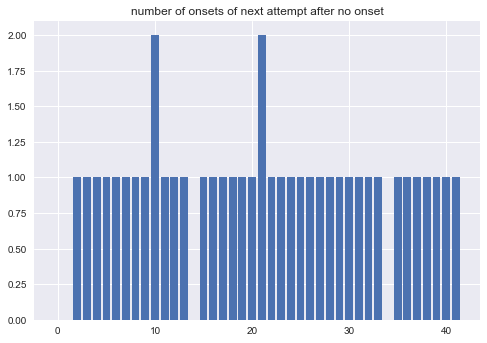

In [12]:
episodes_with_no_onset_idx = [i for i,e in enumerate(episodes) if len(e.detected_audio_onsets) == 0]
print(len(episodes_with_no_onset_idx))
plt.title('number of onsets of next attempt after no onset')
plt.bar(np.arange(0,len(episodes_with_no_onset_idx)),[len(episodes[i+1].detected_audio_onsets) for i in episodes_with_no_onset_idx])

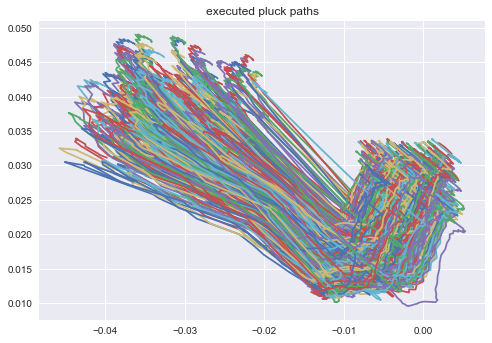

In [13]:
plt.title('executed pluck paths')
for e in episodes:
    plt.plot([p.pose.position.y for p in e.executed_path.poses], [p.pose.position.z for p in e.executed_path.poses])

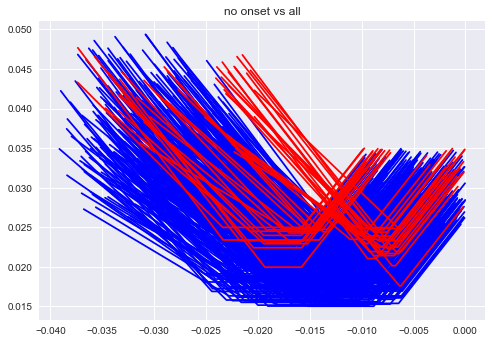

In [14]:
plt.title('no onset vs all')

for e in episodes_with_one_onset:
    plt.plot([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], 'b-')

for e in episodes_with_no_onset:
    plt.plot([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], 'r-')

In [15]:
aps= [e.action_parameters.action_parameters for e in episodes]

In [176]:
e = episodes[125]

In [ ]:
# TODO: where does that weird appendix in the generated trajectory come from?
plt.figure(figsize=(15, 10), dpi=50)
plt.title('executed vs commanded pluck paths')
plt.scatter([p.pose.position.y for p in e.executed_path.poses], [p.pose.position.z for p in e.executed_path.poses], color='b')
plt.scatter([p.pose.position.y for p in e.planned_path.poses], [p.pose.position.z for p in e.planned_path.poses], color='g')
plt.scatter([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], color='r')


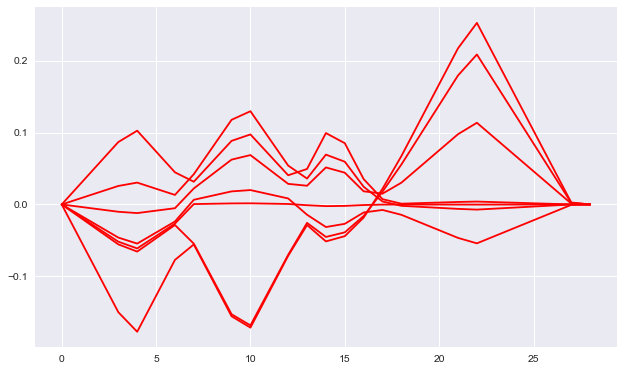

In [99]:
plt.figure(figsize=(10,6), dpi=75)
for i in range(7):
    plt.plot([p.velocities[i] for p in e.planned_trajectory.points], color='r')
    #plt.plot([p.velocities[i] for p in e.executed_trajectory.points], color='b')

In [18]:
e_avg_sample_dt= ((e.executed_trajectory.points[-1].time_from_start - e.executed_trajectory.points[0].time_from_start)/len(e.executed_trajectory.points)).to_sec()
print(f'executed trajectory sampled at {1/e_avg_sample_dt}')

executed trajectory sampled at 50.79399393529871


In [19]:
e.length.to_sec()

1.67866933

In [20]:
e.finger

'ff'

In [21]:
e.string

'e5'

In [22]:
e.string_head_frame

header: 
  seq: 0
  stamp: 
    secs: 1662577775
    nsecs: 489461660
  frame_id: "base_footprint"
child_frame_id: "guzheng/e5/head"
transform: 
  translation: 
    x: 0.49195659160614014
    y: -0.4679965078830719
    z: 0.6575279235839844
  rotation: 
    x: 0.05053577572107315
    y: -0.04349614307284355
    z: 0.7377201318740845
    w: 0.6718062162399292

In [23]:
e.finger_start_pose

header: 
  seq: 0
  stamp: 
    secs: 1662577771
    nsecs: 826041460
  frame_id: "guzheng/e5/head"
pose: 
  position: 
    x: 0.05220761138102381
    y: -0.0017837329532366941
    z: 0.033135057976845905
  orientation: 
    x: -0.48158293602949326
    y: -0.518557184956952
    z: 0.5423708056782477
    w: -0.4527809570239591

(array([ 6., 28., 40., 68., 83., 63., 52., 20., 40., 18.]),
 array([1.18228912, 1.22651098, 1.27073283, 1.31495469, 1.35917654,
        1.40339839, 1.44762025, 1.4918421 , 1.53606396, 1.58028581,
        1.62450767]),
 <BarContainer object of 10 artists>)

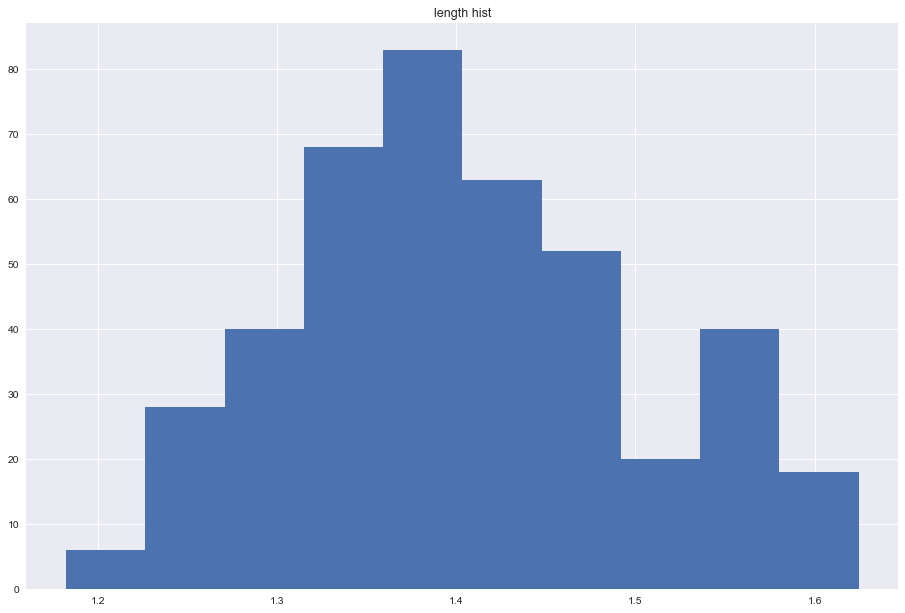

In [107]:
plt.figure(figsize=(15,10), dpi=75)
plt.title('length hist')
plt.hist([e.header.stamp.to_sec() + e.length.to_sec() - e.start_execution.to_sec() for e in episodes])

(array([ 6., 28., 40., 68., 83., 63., 52., 20., 40., 18.]),
 array([1.18228916, 1.226511  , 1.27073285, 1.31495469, 1.35917654,
        1.40339838, 1.44762023, 1.49184207, 1.53606392, 1.58028576,
        1.62450761]),
 <BarContainer object of 10 artists>)

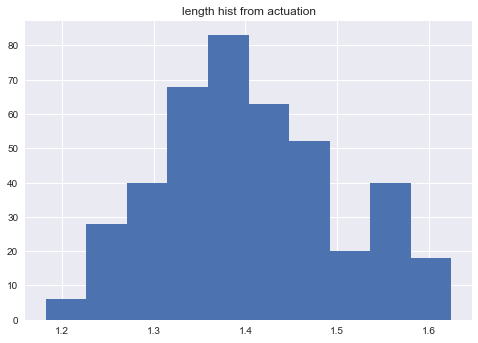

In [25]:
plt.title('length hist from actuation')
plt.hist([(e.header.stamp + e.length - e.start_execution).to_sec() for e in episodes])

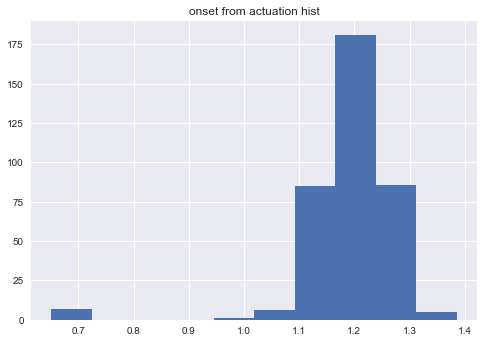

In [26]:
plt.title('onset from actuation hist')
onsets_from_start_execution= [(e.detected_audio_onsets[0].header.stamp - e.start_execution).to_sec() for e in episodes_with_one_onset]
onsets_from_start_execution= [o for o in onsets_from_start_execution if o > 0]
plt.hist(onsets_from_start_execution);
#plt.violinplot()

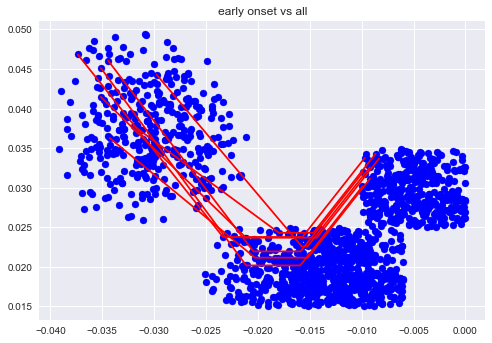

In [27]:
plt.title('early onset vs all')

for e in episodes_with_one_onset:
    plt.scatter([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], color= 'b')

episodes_with_early_onset= [e for e in episodes_with_one_onset if e.detected_audio_onsets[0].header.stamp - e.start_execution < rospy.Duration(0.9)]
for e in episodes_with_early_onset:
    plt.plot([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], 'r')

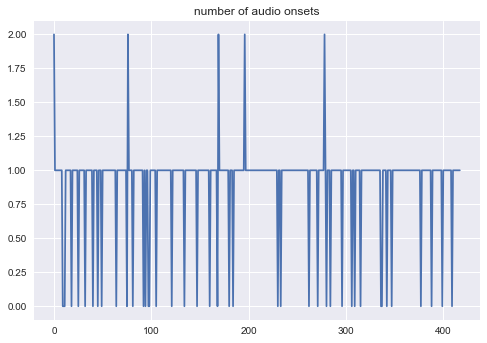

In [28]:
plt.title('number of audio onsets')
plt.plot([len(e.detected_audio_onsets) for e in episodes])

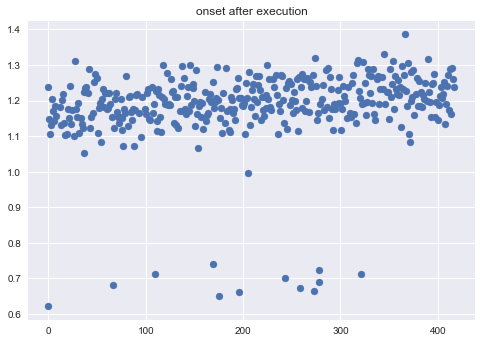

In [29]:
i = 0
plt.title('onset after execution')
onsets = []
for e in episodes:
    for o in e.detected_audio_onsets:
        #if len(onsets) > 1:
        onsets.append((i, (o.header.stamp - e.start_execution).to_sec()))
        #    print(i)
    i+= 1
plt.scatter([i for i,o in onsets], [o for i,o in onsets])

In [30]:
print(f"experiment ran for {(episodes[-1].header.stamp - episodes[0].header.stamp).to_sec()/60} minutes")

experiment ran for 43.014687820283335 minutes


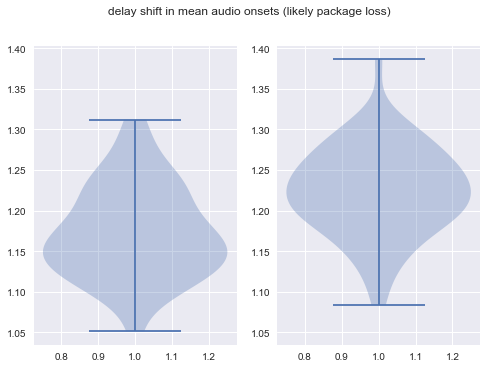

In [31]:
onsets_early = [o for i, o in onsets if i < 50 and o > 0.9]
onsets_late = [o for i, o in onsets if i > 350 and o > 0.9]
plt.suptitle('delay shift in mean audio onsets (likely package loss)')
plt.subplot(1,2,1)
ax = plt.gca()
plt.violinplot(onsets_early);
plt.subplot(1,2,2, sharey= ax)
plt.violinplot(onsets_late);

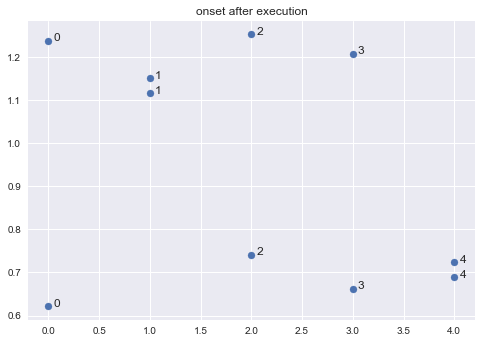

In [32]:
plt.title('onset after execution')
onsets= []
i = 0
for e in episodes_with_two_onsets:
    for o in e.detected_audio_onsets:
        onsets.append((i, (o.header.stamp - e.start_execution).to_sec()))
        #    print(i)
    i+= 1
plt.scatter([i for i,o in onsets], [o for i,o in onsets])
for i, o in onsets:
    plt.text(i+0.05, o, str(i), fontsize=12)

In [122]:
e = episodes_with_two_onsets[3]

In [123]:
audio_pub.publish(e.audio_data.data)

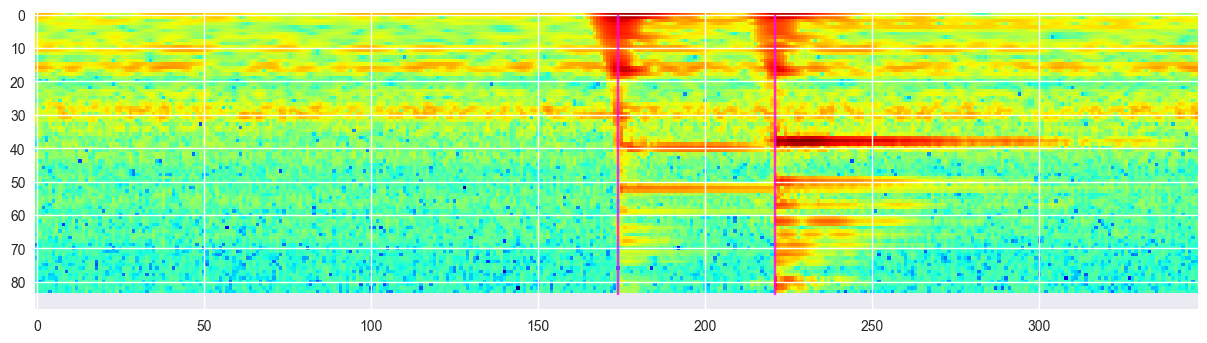

In [124]:
plt.figure(figsize=(15,8), dpi=100)
plt.imshow(np.log(np.array(e.cqt.data).reshape((-1,e.cqt.number_of_semitones))).T, cmap='jet')
o = e.detected_audio_onsets[0]
plt.vlines([int((o.header.stamp-e.cqt.header.stamp)/e.cqt.hop_length) for o in e.detected_audio_onsets], ymin=0, ymax= 84, color=(1,0,1,0.8))

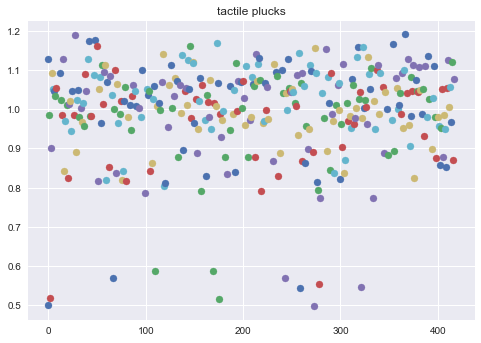

In [36]:
i = 0
plt.figure()
plt.title('tactile plucks')
for e in episodes:
    onsets = []
    for o in e.detected_tactile_plucks:
        onsets.append((o - e.start_execution).to_sec())
    plt.scatter([i] * len(onsets), onsets)
    i+= 1

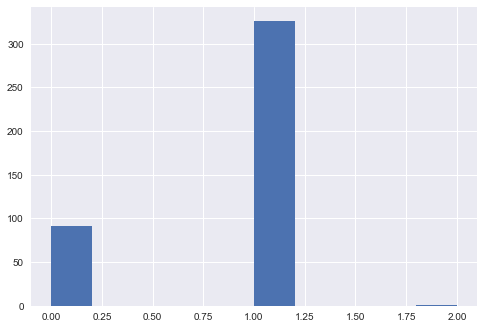

In [37]:
plt.hist([len(e.detected_tactile_plucks) for e in episodes]);

In [38]:
[idx for idx, e in enumerate(episodes) if len(e.detected_tactile_plucks) > 8]

[]

In [39]:
len(episodes_with_two_onsets)

5

In [40]:
len(episodes_with_many_onsets)

0

In [41]:
two_tactile_plucks= [e for e in episodes if len(e.detected_tactile_plucks) == 2]
len(two_tactile_plucks)

1

In [42]:
audio_pub.publish(episodes_with_two_onsets[0].audio_data.data)

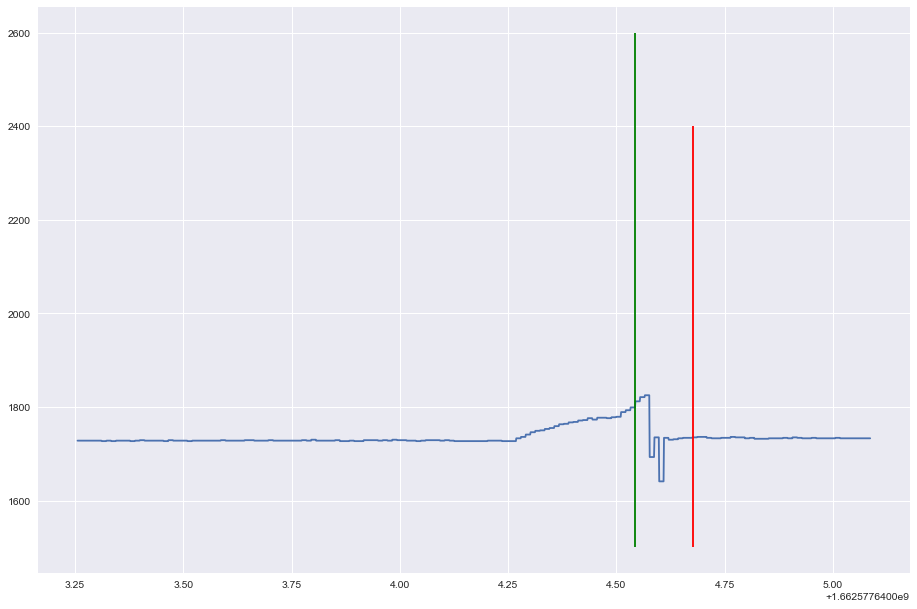

In [138]:
e = episodes_with_two_onsets[0]
e = episodes[17]
plt.figure(figsize=(15,10), dpi=75)
plt.plot([t.header.stamp.to_sec() for t in e.tactile_data[0:int(len(e.tactile_data)/2)]],[t.tactile.pdc for t in e.tactile_data[0:int(len(e.tactile_data)/2)]])
plt.vlines([o.header.stamp.to_sec() for o in e.detected_audio_onsets], 1500, 2400, 'red')
plt.vlines([o.to_sec() for o in e.detected_tactile_plucks], 1500, 2600, 'green')

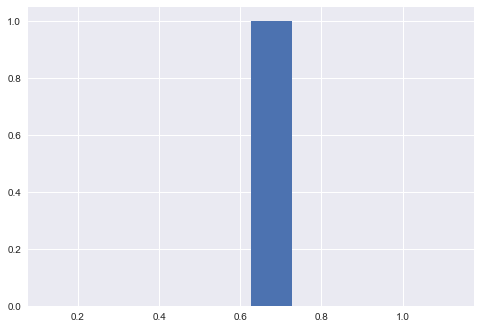

In [139]:
plt.hist([(e.detected_tactile_plucks[1]-e.detected_tactile_plucks[0]).to_sec() for e in two_tactile_plucks]);

In [140]:
len(episodes_with_one_onset)

371

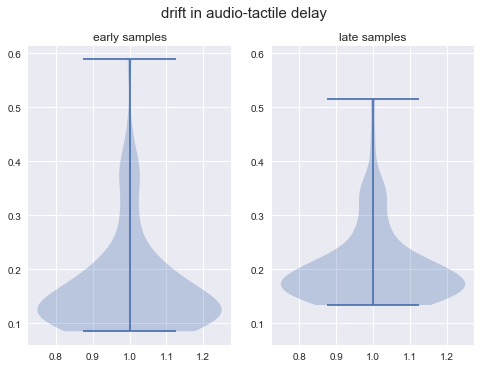

In [141]:
plt.suptitle('drift in audio-tactile delay', fontsize=15)
plt.subplot(1,2,1)
ax = plt.gca()
plt.title('early samples')
plt.violinplot([(e.detected_audio_onsets[0].header.stamp-e.detected_tactile_plucks[0]).to_sec() for i, e in enumerate(episodes_with_one_onset) if len(e.detected_tactile_plucks) > 0 and i < 100]);
plt.subplot(1,2,2, sharey= ax)
plt.title('late samples')
plt.violinplot([(e.detected_audio_onsets[0].header.stamp-e.detected_tactile_plucks[0]).to_sec() for i, e in enumerate(episodes_with_one_onset) if len(e.detected_tactile_plucks) > 0 and i > 271]);

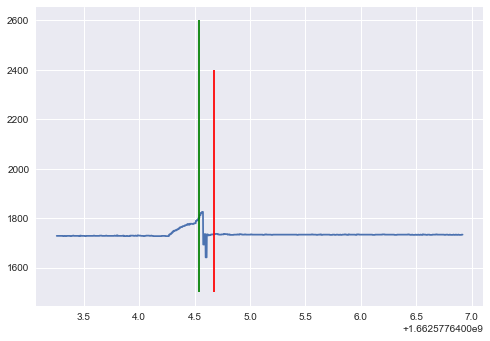

In [142]:
plt.plot([t.header.stamp.to_sec() for t in e.tactile_data],[t.tactile.pdc for t in e.tactile_data])
plt.vlines([o.header.stamp.to_sec() for o in e.detected_audio_onsets], 1500, 2400, 'red')
plt.vlines([o.to_sec() for o in e.detected_tactile_plucks], 1500, 2600, 'green')

# next audio onsets:
#nxt_e = episodes[next(idx for idx, e2 in enumerate(episodes) if e2.id == e.id)+1]
#plt.vlines([o.header.stamp.to_sec() for o in nxt_e.detected_audio_onsets], 1500, 2400, 'orange')


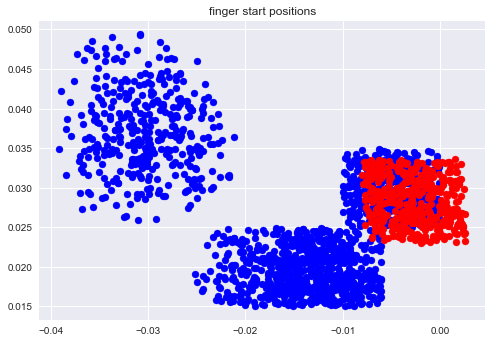

In [143]:
### FINGER_START_POSES SEEM INVALID ?

fps= [e.finger_start_pose.pose for e in episodes]
plt.title('finger start positions')
for e in episodes_with_one_onset:
    plt.scatter([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], color='b')

plt.scatter([f.position.y for f in fps], [f.position.z for f in fps],  color='r')

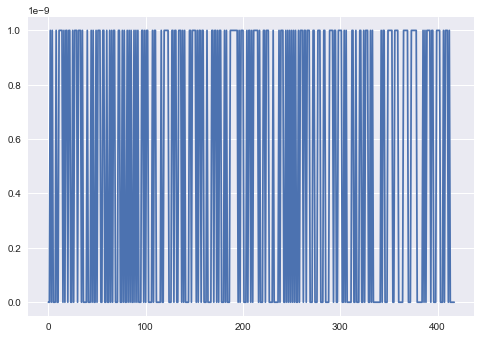

In [144]:
plt.plot([(e.finger_start_pose.header.stamp-e.header.stamp).to_sec() for e in episodes])

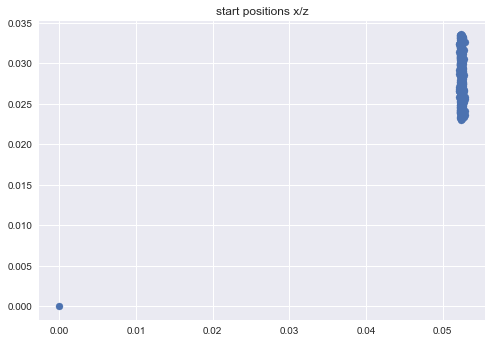

In [145]:
plt.title('start positions x/z')
plt.scatter([f.position.x for f in fps]+[0.0], [f.position.z for f in fps]+[0.0])

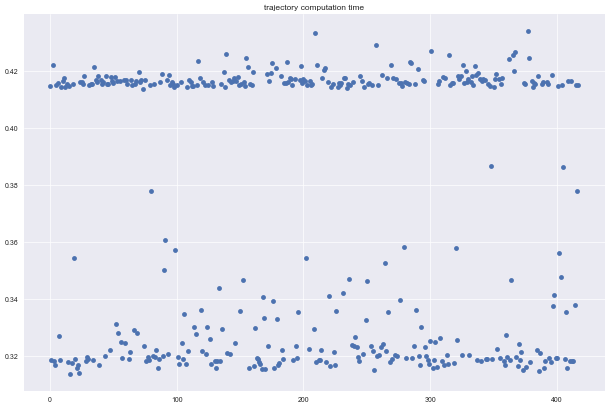

In [146]:
plt.figure(figsize=(15,10), dpi=50)
plt.title('trajectory computation time')
plt.plot([(e.start_execution-e.header.stamp).to_sec() for e in episodes], 'o')

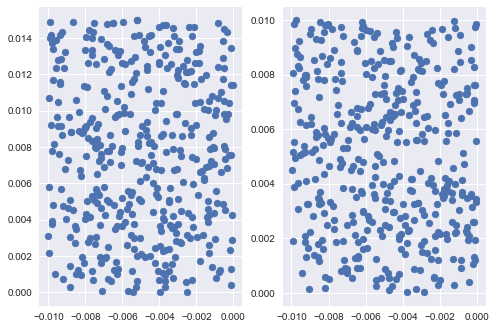

In [147]:
plt.title('action parameters')
plt.subplot(1,2,1)
i= 0
plt.scatter([e.action_parameters.action_parameters[i] for e in episodes], [e.action_parameters.action_parameters[i+1] for e in episodes])
plt.subplot(1,2, 2)
i= 2
plt.scatter([e.action_parameters.action_parameters[i] for e in episodes], [e.action_parameters.action_parameters[i+1] for e in episodes])

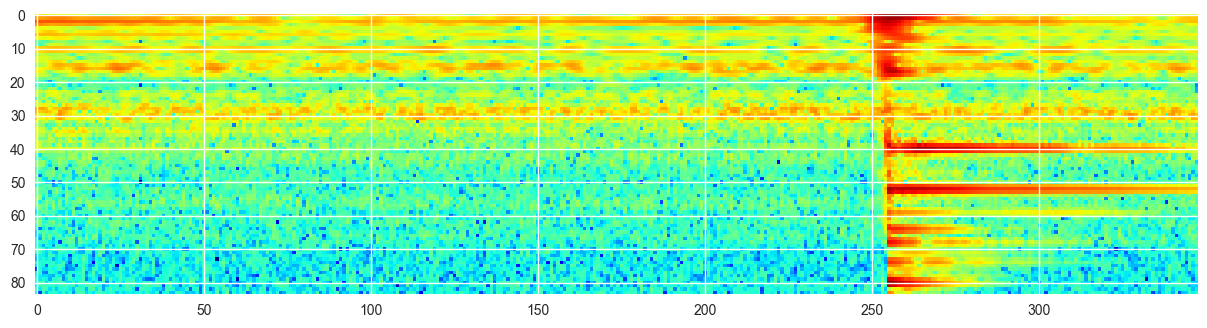

In [152]:
big_plot()
cqt= np.array(e.cqt.data).reshape((-1,e.cqt.number_of_semitones))
cqt.shape
plt.imshow(np.log(cqt).T, cmap='jet')

In [149]:
print('    cqt start:', e.cqt.header.stamp.to_sec())
print('episode start:', e.header.stamp.to_sec())
print('        onset:', e.detected_audio_onsets[0].header.stamp.to_sec())
print('  episode end:', (e.header.stamp+e.length).to_sec())
print('      cqt end:', (e.cqt.header.stamp + e.cqt.hop_length*cqt.shape[0]).to_sec())

print('   hop length:', e.cqt.hop_length.to_sec())

onset_cqt_idx = int((e.detected_audio_onsets[0].header.stamp-e.cqt.header.stamp)/e.cqt.hop_length)
print('onset index: ', onset_cqt_idx)


    cqt start: 1662580119.1202044
episode start: 1662580120.417348
        onset: 1662580122.0714517
  episode end: 1662580122.3763058
      cqt end: 1662580123.1604764
   hop length: 0.011609977
onset index:  254


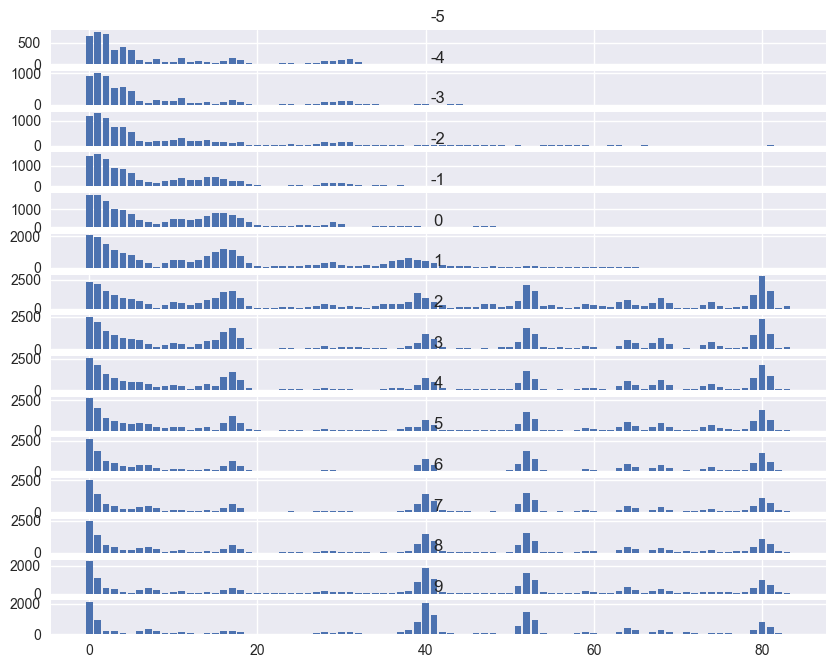

In [150]:
plt.figure(figsize=(10,8),dpi= 100)
for i in range(-5, 10):
    plt.subplot(15,1, i+6)
    plt.title(f'{i}')
    plt.bar(np.arange(0, cqt.shape[1]), cqt[onset_cqt_idx+i,:])

40


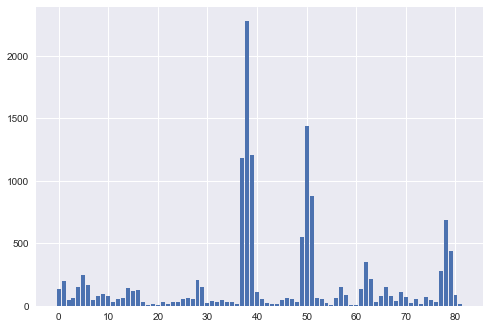

In [56]:
plt.bar(range(0, e.cqt.number_of_semitones-2), cqt[257+7,2:])
print(np.argmax(cqt[257+7,2:])+2)

In [153]:
e.cqt.min_note

'C2'

In [58]:
onset_cqt_idxs = [int((e.detected_audio_onsets[0].header.stamp-e.cqt.header.stamp)/e.cqt.hop_length) for e in episodes_with_one_onset]

In [59]:
next(i for i,ee in enumerate(episodes_with_one_onset) if e.id == ee.id)

370

In [60]:
cqts= [np.array(e.cqt.data).reshape((-1,e.cqt.number_of_semitones)) for e in episodes_with_one_onset]

In [61]:
onset_cqts= np.array([c[i,:] for c, i in zip(cqts, onset_cqt_idxs)])

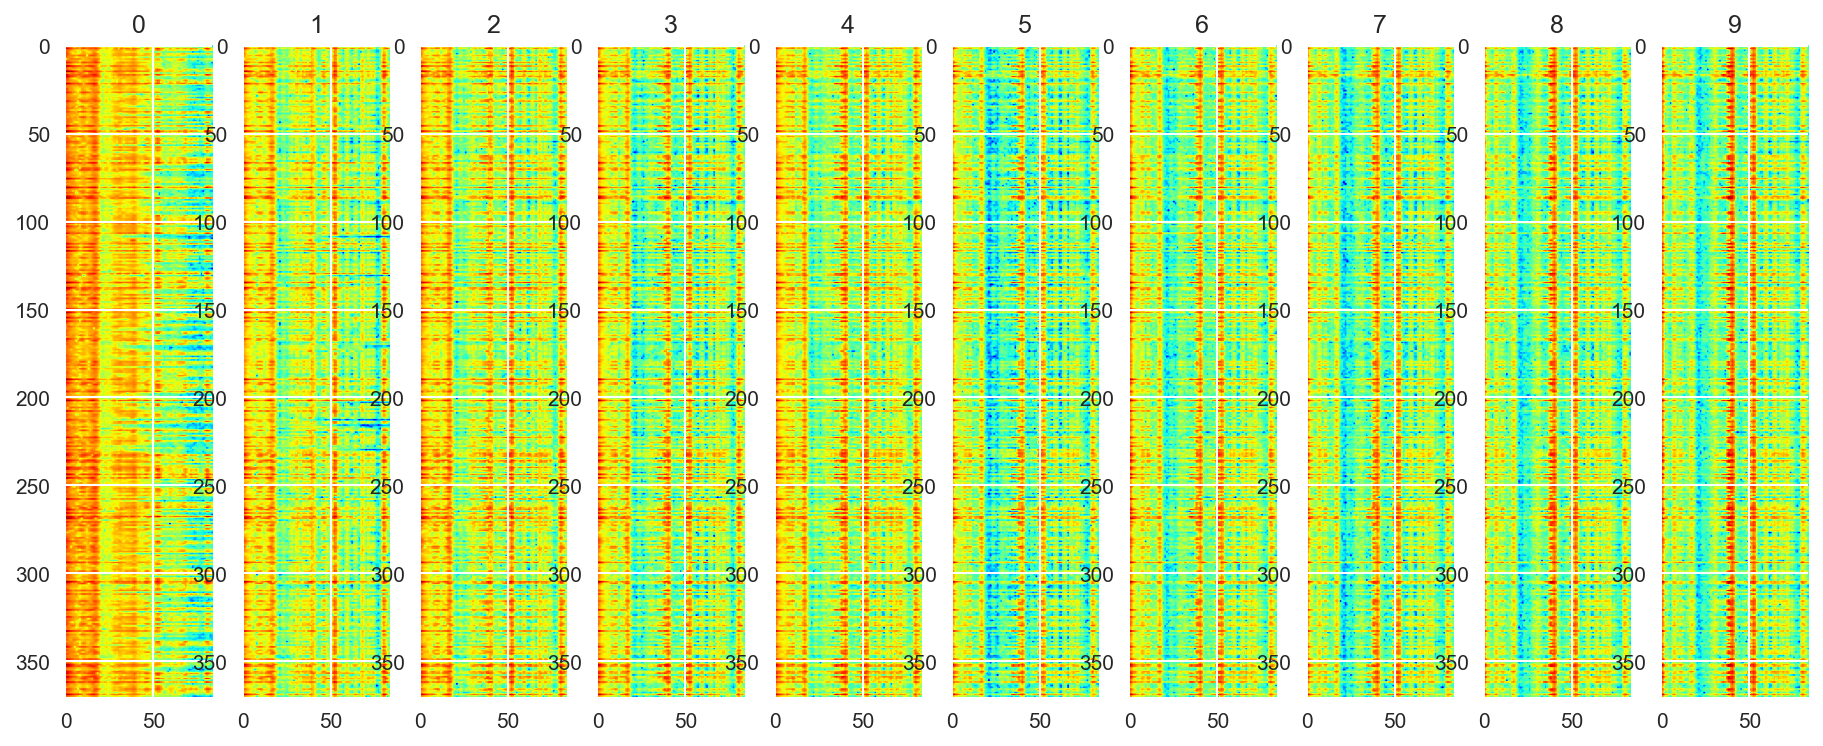

In [155]:
plt.figure(figsize=(15,8),dpi= 150)
shared_ax= None
for i in range(10):
    onset_cqts= np.array([c[oi+i,:] for c, oi in zip(cqts, onset_cqt_idxs)])
    shared_ax = plt.subplot(1,10, i+1, sharey= shared_ax)
    plt.title(f'{i}')
    plt.imshow(np.log(onset_cqts), cmap='jet')

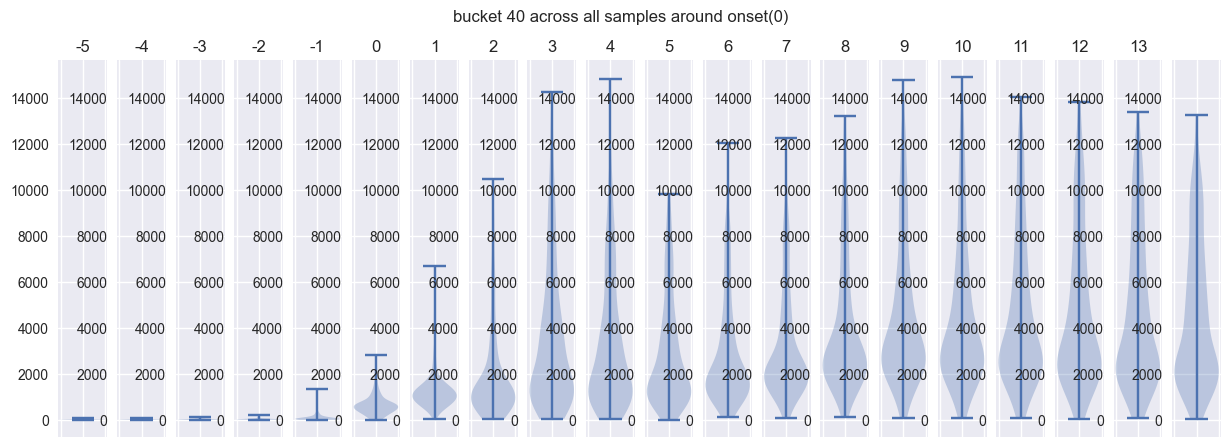

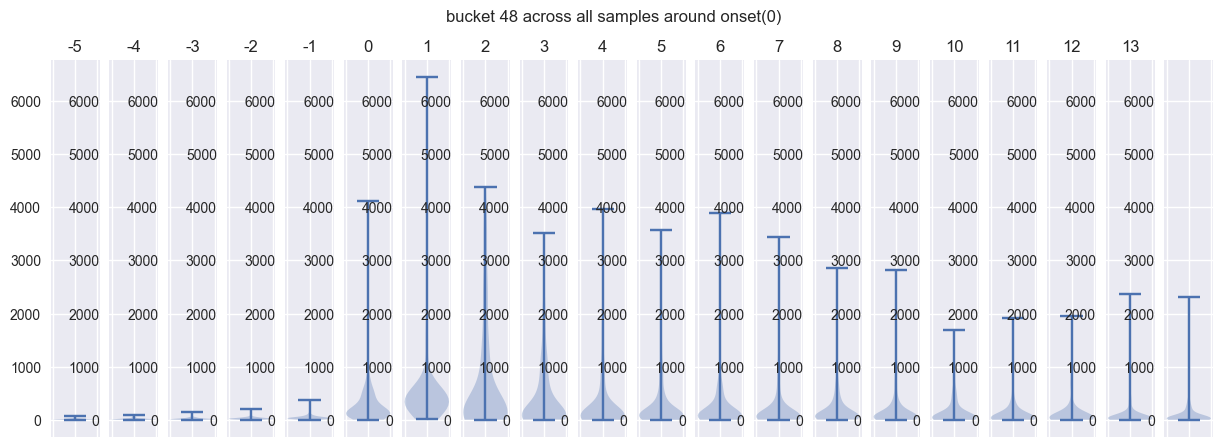

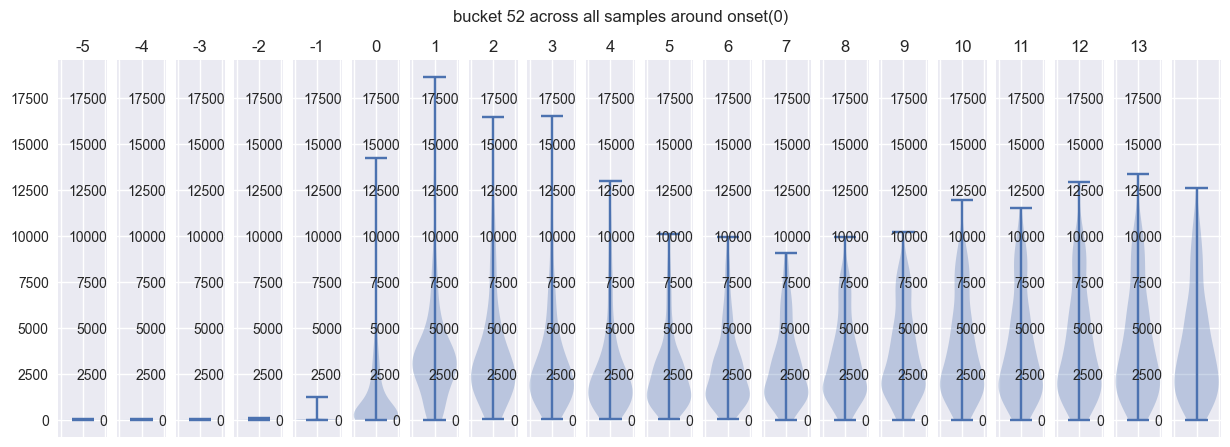

In [63]:
# E5
for note in [40, 40+8, 40+12]:
    plt.figure(figsize=(15,5),dpi= 100)
    plt.tick_params('y', labelleft=True)
    ax= None
    plt.suptitle(f'bucket {note} across all samples around onset(0)')
    subplotidx= 1
    for i in range(-5,15):
        onset_cqts= np.array([c[oi+i,:] for c, oi in zip(cqts, onset_cqt_idxs)])
        ax= plt.subplot(1,20, subplotidx, sharey= ax)
        subplotidx+= 1
        if subplotidx <= 20:
            plt.title(f'{i}')
        plt.tick_params('x', labelbottom=False)
        plt.violinplot(onset_cqts[:,note])
        #plt.hist(onset_cqts[:,note], orientation= 'horizontal')

In [64]:
note_after_transient = np.array([c[oi+3,40] for c, oi in zip(cqts, onset_cqt_idxs)])

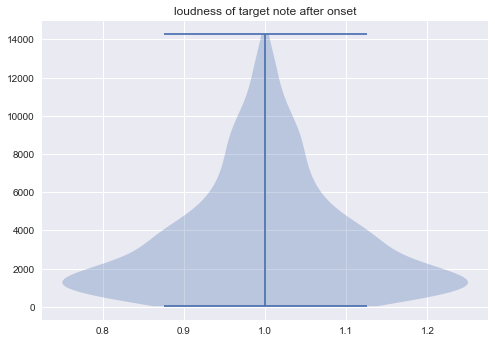

In [65]:
plt.title('loudness of target note after onset')
plt.violinplot(note_after_transient);

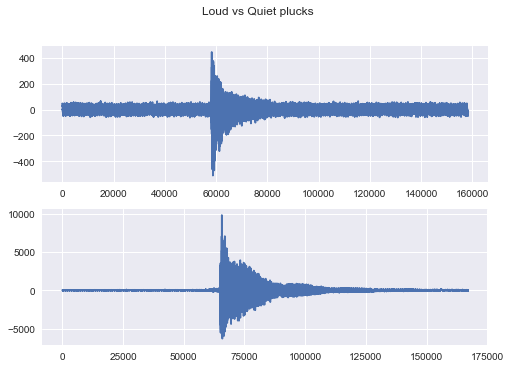

In [66]:
idx_quiet = np.argmin(note_after_transient)
idx_loud = np.argmax(note_after_transient)

data_quiet = episodes_with_one_onset[idx_quiet].audio_data.data
data_loud = episodes_with_one_onset[idx_loud].audio_data.data

audio_quiet = np.array(struct.unpack('{0}h'.format(int(len(data_quiet)/2)), data_quiet), dtype=float)
audio_loud = np.array(struct.unpack('{0}h'.format(int(len(data_loud)/2)), data_loud), dtype=float)

plt.suptitle('Loud vs Quiet plucks')
plt.subplot(2,1,1)
plt.plot(audio_quiet)
plt.subplot(2,1,2)
plt.plot(audio_loud)

In [158]:
audio_pub.publish(data_quiet)
rospy.sleep(3.0)
audio_pub.publish(data_loud)

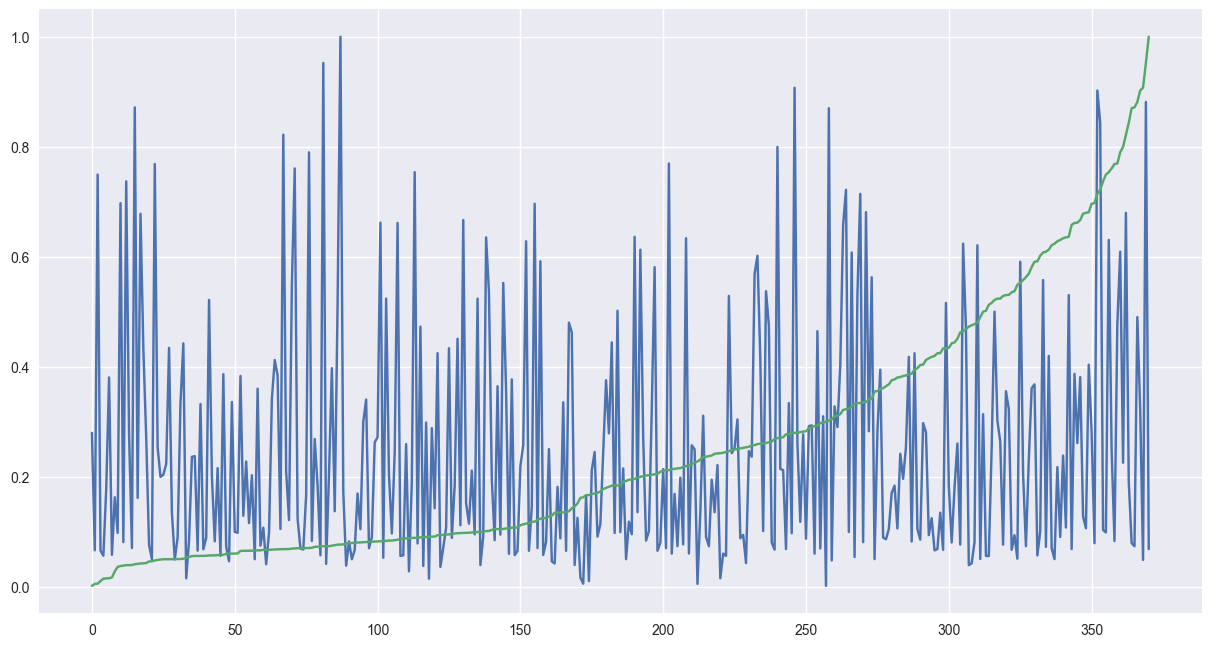

In [159]:
big_plot()
note_after_transient_normalized= note_after_transient/np.max(note_after_transient)
plt.plot(note_after_transient_normalized)
plt.plot(sorted(note_after_transient_normalized))

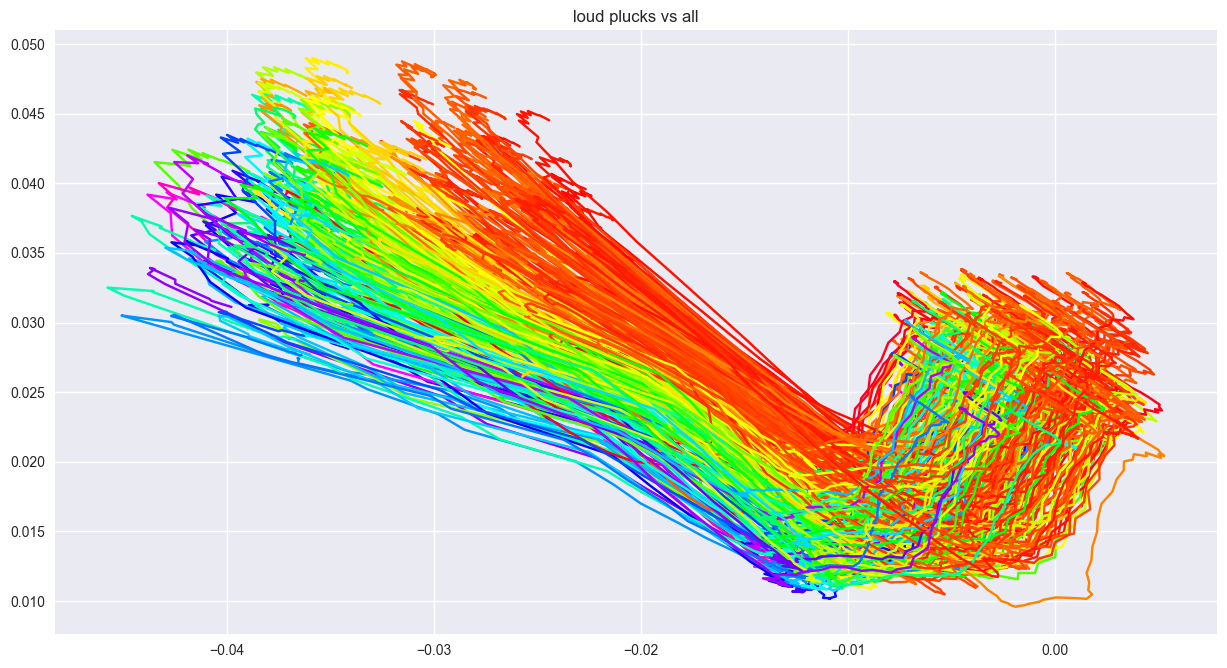

In [161]:
big_plot()
plt.title('loud plucks vs all')

for i, e in enumerate(episodes_with_one_onset):
    plt.plot([p.pose.position.y for p in e.executed_path.poses], [p.pose.position.z for p in e.executed_path.poses], color= plt.get_cmap('gist_rainbow')(note_after_transient_normalized[i]))

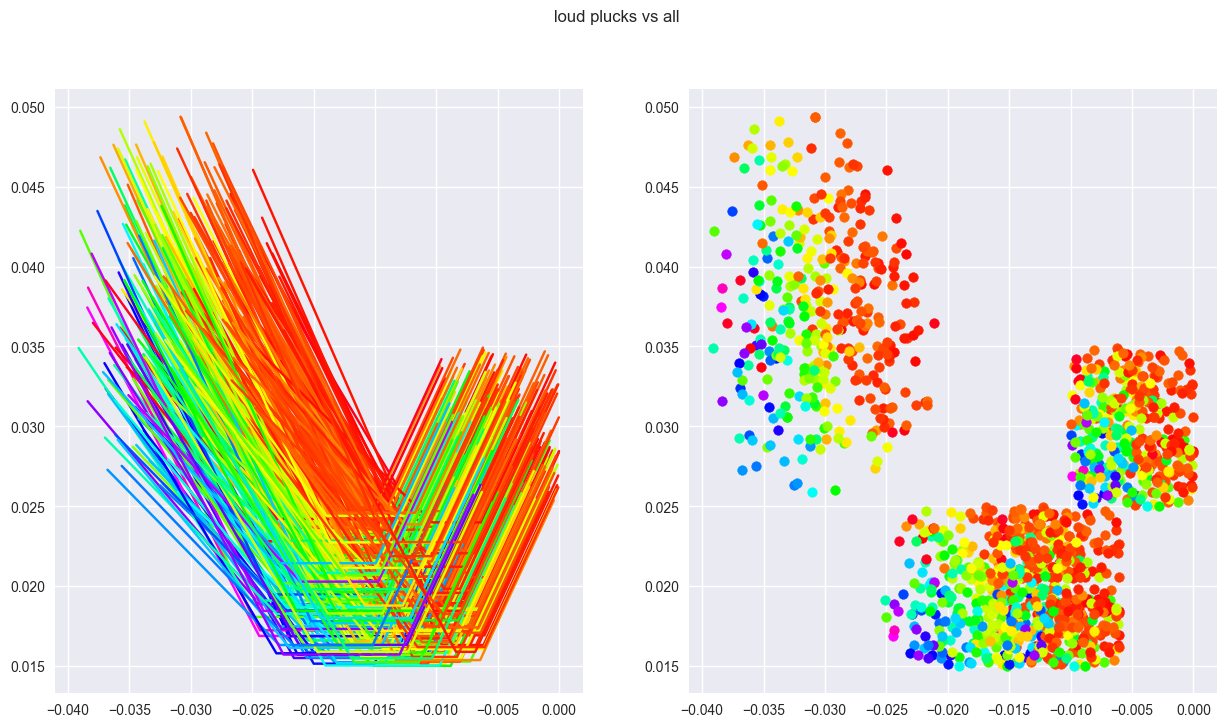

In [69]:
plt.figure(figsize=(15,8), dpi=100)
plt.suptitle('loud plucks vs all')

plt.subplot(1,2,1)
for i,e in enumerate(episodes_with_one_onset):
    plt.plot([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], color= plt.get_cmap('gist_rainbow')(note_after_transient_normalized[i]))
plt.subplot(1,2,2)
for i,e in enumerate(episodes_with_one_onset):
    plt.scatter([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], color= plt.get_cmap('gist_rainbow')(note_after_transient_normalized[i]))

#loud_episodes = [e for i, e in enumerate(episodes_with_one_onset) if note_after_transient[i] > 10000]
#for e in loud_episodes:
#    plt.plot([p.pose.position.y for p in e.commanded_path.poses], [p.pose.position.z for p in e.commanded_path.poses], 'r')

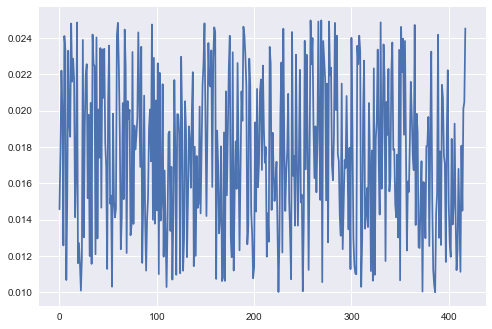

In [166]:
plt.plot([e.commanded_path.poses[-1].pose.position.z- e.commanded_path.poses[-2].pose.position.z for e in episodes])

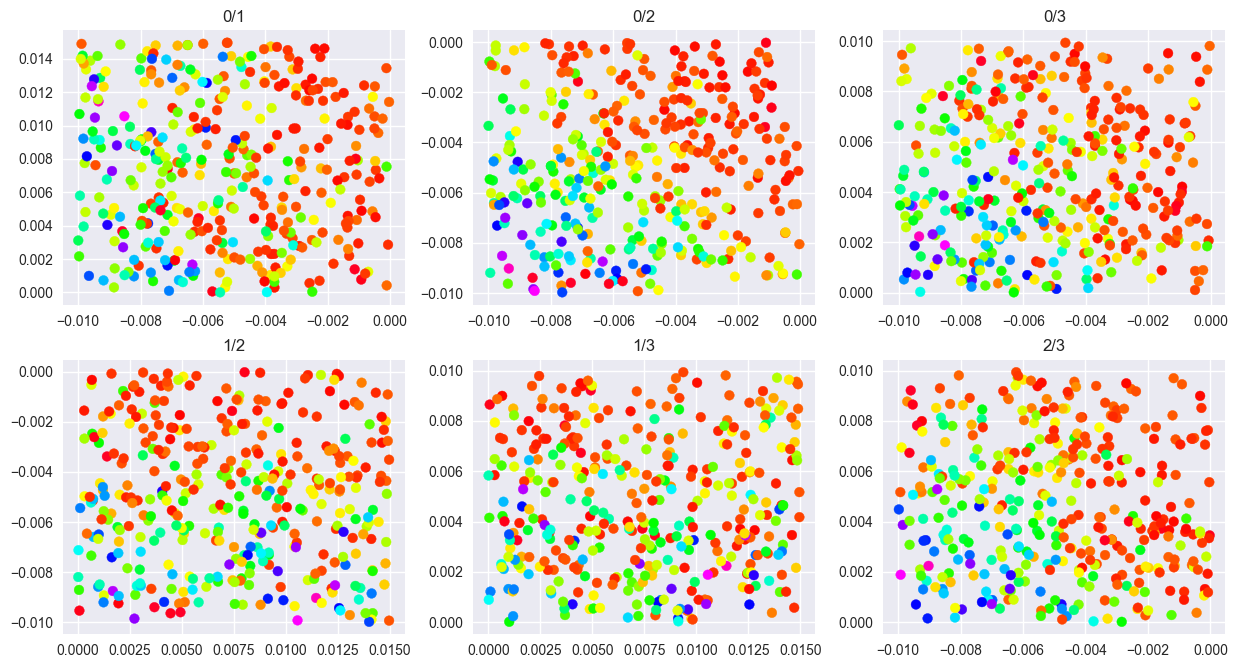

In [70]:
from itertools import combinations

plt.figure(figsize=(15,8), dpi=100)
plt.title('action parameters')
sidx= 1
for i,j in combinations(range(4), 2):
    plt.subplot(2,3,sidx)
    plt.title(f'{i}/{j}')
    sidx+= 1
    plt.scatter([e.action_parameters.action_parameters[i] for e in episodes_with_one_onset], [e.action_parameters.action_parameters[j] for e in episodes_with_one_onset], cmap=plt.get_cmap('gist_rainbow'), c=note_after_transient_normalized)
    #plt.scatter([e.action_parameters.action_parameters[i] for e in episodes_with_no_onset], [e.action_parameters.action_parameters[j] for e in episodes_with_no_onset], color='r')

In [71]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [72]:
parameter_tensor = F.normalize(torch.FloatTensor([e.action_parameters.action_parameters for e in episodes_with_one_onset]), dim=1)
volume_tensor = F.normalize(torch.FloatTensor(note_after_transient), dim=0)

In [73]:
ds= [(parameter_tensor[i,:], volume_tensor[i]) for i in range(len(note_after_transient))]

In [74]:
dl = torch.utils.data.DataLoader(ds, shuffle= True)

In [75]:
# regress volume
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        #x = F.softmax(self.fc1(x))
        #x = F.relu(self.fc2(x))
        return x

net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [76]:
for epoch in range(1,101):
    for i, data in enumerate(dl):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    if epoch % 50 == 0:
        print(f'{epoch}')

/home/v4hn/python/lib/python3.10/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


50
100


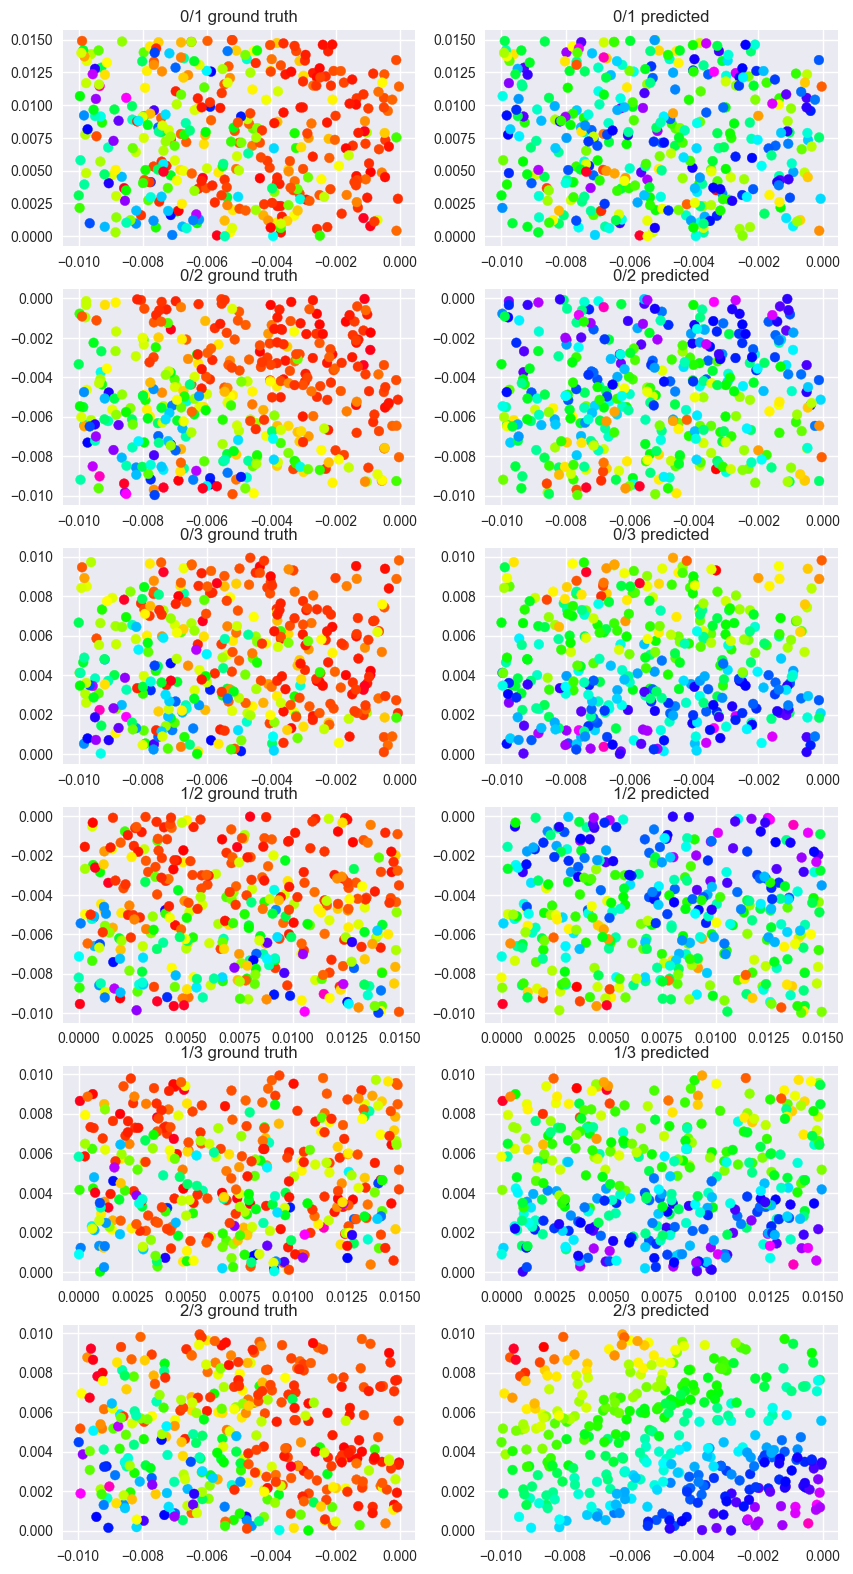

In [77]:
pred = net(torch.FloatTensor([e.action_parameters.action_parameters for e in episodes_with_one_onset])).detach().numpy();
pred.shape

plt.figure(figsize=(10,20), dpi=100)
plt.title('action parameters')
sidx= 1
combs = list(combinations(range(4), 2))
for i,j in combs:
    plt.subplot(len(combs),2,sidx)
    sidx+=1
    plt.title(f'{i}/{j} ground truth')
    plt.scatter([e.action_parameters.action_parameters[i] for e in episodes_with_one_onset], [e.action_parameters.action_parameters[j] for e in episodes_with_one_onset], cmap=plt.get_cmap('gist_rainbow'), c=note_after_transient_normalized)
    plt.subplot(len(combs),2,sidx)
    plt.title(f'{i}/{j} predicted')
    sidx+= 1
    plt.scatter([e.action_parameters.action_parameters[i] for e in episodes_with_one_onset], [e.action_parameters.action_parameters[j] for e in episodes_with_one_onset], cmap=plt.get_cmap('gist_rainbow'), c=pred)